In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()
%matplotlib inline
plt.style.use('fivethirtyeight')


In [2]:
## We download our data and make basic quality checks

path_bm = '/content/drive/MyDrive/OPI/BOPS_case/bops_bm.csv'
path_bop = '/content/drive/MyDrive/OPI/BOPS_case/bops_online.csv'
path_dict = '/content/drive/MyDrive/OPI/BOPS_case/diccionarios.xlsx'

bm = pd.read_csv(path_bm,usecols=range(0,7),thousands=',')
ol = pd.read_csv(path_bop,usecols=range(0,7),thousands=',')
dic = pd.read_excel(path_dict)

In [3]:
bm.head()

,id (store),year,month,week,usa,after,sales
0,1.0,2011.0,4.0,16.0,0.0,0.0,118691.0
1,1.0,2011.0,4.0,17.0,0.0,0.0,113804.0
2,1.0,2011.0,4.0,18.0,0.0,0.0,172104.0
3,1.0,2011.0,5.0,19.0,0.0,0.0,105591.0
4,1.0,2011.0,5.0,20.0,0.0,0.0,94884.0


In [4]:
bm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4538 entries, 0 to 4537
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id (store)  4536 non-null   float64
 1   year        4536 non-null   float64
 2   month       4536 non-null   float64
 3   week        4536 non-null   float64
 4   usa         4536 non-null   float64
 5   after       4536 non-null   float64
 6    sales      4536 non-null   float64
dtypes: float64(7)
memory usage: 248.3 KB


In [7]:
ol.head()

,id (DMA),year,month,week,after,close,sales
0,1,2011,4,17,0,1,18564
1,1,2011,4,18,0,1,30883
2,1,2011,5,19,0,1,37425
3,1,2011,5,20,0,1,32563
4,1,2011,5,21,0,1,35773


In [8]:
ol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10710 entries, 0 to 10709
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   id (DMA)  10710 non-null  int64
 1   year      10710 non-null  int64
 2   month     10710 non-null  int64
 3   week      10710 non-null  int64
 4   after     10710 non-null  int64
 5   close     10710 non-null  int64
 6    sales    10710 non-null  int64
dtypes: int64(7)
memory usage: 585.8 KB


In [9]:
dic.head()

,id (DMA),year,month,week,after,close,sales
0,1,2011,4,17,0,1,18564.46094
1,1,2011,4,18,0,1,30882.56055
2,1,2011,5,19,0,1,37424.92578
3,1,2011,5,20,0,1,32562.69336
4,1,2011,5,21,0,1,35772.67188


In [10]:
dic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10710 entries, 0 to 10709
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id (DMA)  10710 non-null  int64  
 1   year      10710 non-null  int64  
 2   month     10710 non-null  int64  
 3   week      10710 non-null  int64  
 4   after     10710 non-null  int64  
 5   close     10710 non-null  int64  
 6   sales     10710 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 585.8 KB


Let us see how did physical (BM) stores, both in Canada and the US, did before and after the entry of BOPS:


In [12]:
## We define 2 dataframes, for before and after BOPS:

bm_before= bm[bm['after']==0]
bm_after= bm[bm['after']==1]

BM total sales in the period before introduction of BOPS:


In [13]:

bm_before[' sales '].sum()

153420472.0

BM total sales in the period after introduction of BOPS:


In [14]:


bm_after[' sales '].sum()

136308894.0

BM loss: -17 M, approx:


In [15]:

bm_after[' sales '].sum() -bm_before[' sales '].sum()

-17111578.0

Percentual loss: -11%, approx:


In [16]:

((bm_after[' sales '].sum() - bm_before[' sales '].sum())/bm_before[' sales '].sum())*100

-11.153386361632364

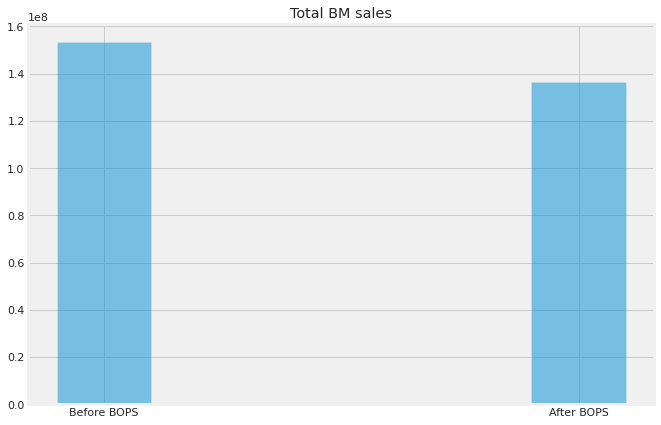

In [25]:
plt.figure(figsize=(10,7))
plt.bar(('Before BOPS','After BOPS'),(bm_before[' sales '].sum(),bm_after[' sales '].sum()),alpha=0.5,width=0.2)
plt.title('Total BM sales')
plt.show()

In [ ]:
########################################

Now, let us check how Online Retail (OL), both in the US and Canada, did before and after the introduction of BOPS:


In [19]:

ol_before= ol[ol['after']==0]
ol_after= ol[ol['after']==1]

Online total sales in the period before introduction of BOPS:


In [20]:

ol_before[' sales '].sum()

80468614

Online total sales in the period after introduction of BOPS:


In [22]:

ol_after[' sales '].sum()

66854985

Online Loss: -13.6 M, approx:


In [21]:

ol_after[' sales '].sum() -ol_before[' sales '].sum()

-13613629

Percentual loss: -17% approx:


In [23]:

((ol_after[' sales '].sum() - ol_before[' sales '].sum())/ol_before[' sales '].sum())*100

-16.91793647645031

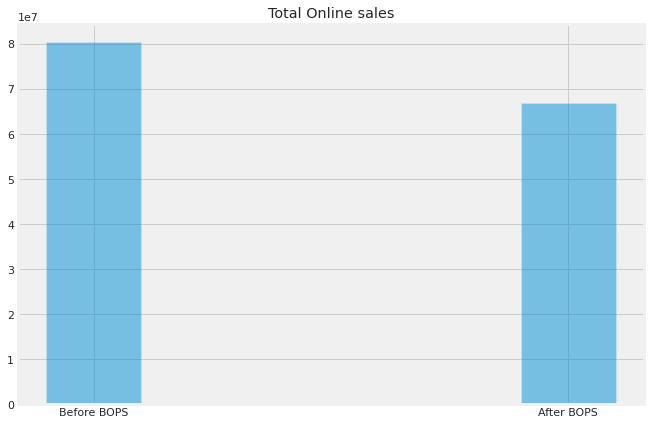

In [26]:
plt.figure(figsize=(10,7))
plt.bar(('Before BOPS','After BOPS'),[ol_before[' sales '].sum(),ol_after[' sales '].sum()],alpha=0.5,width=0.2)
plt.title('Total Online sales')
plt.show()

We make some simple comparison plots:

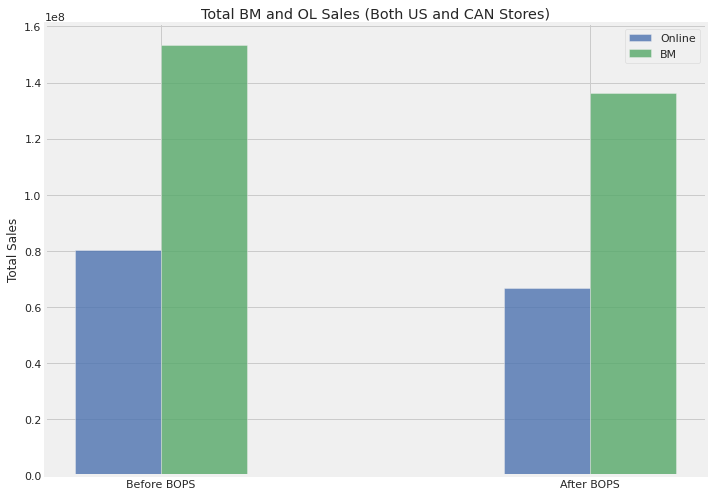

In [29]:
# data to plot
n_groups = 2
ol_list = (ol_before[' sales '].sum(),ol_after[' sales '].sum())
bm_list = (bm_before[' sales '].sum(),bm_after[' sales '].sum())

# create plot
fig, ax = plt.subplots(figsize=(10,7))
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8

rects1 = plt.bar(index, ol_list, bar_width,
alpha=opacity,
color='b',
label='Online')

rects2 = plt.bar(index + bar_width, bm_list, bar_width,
alpha=opacity,
color='g',
label='BM')

plt.ylabel('Total Sales')
plt.xticks(index + bar_width*(1/2), ('Before BOPS', 'After BOPS'))
plt.title('Total BM and OL Sales (Both US and CAN Stores)')
plt.legend()

plt.tight_layout()
plt.show()

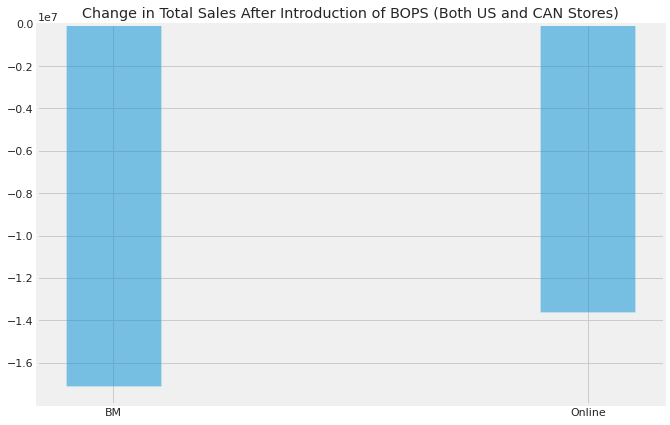

In [37]:
plt.figure(figsize=(10,7))
plt.bar(('BM','Online'),[
((bm_after[' sales '].sum() - bm_before[' sales '].sum())),
((ol_after[' sales '].sum() - ol_before[' sales '].sum()))],alpha=0.5,width=0.2)
plt.title('Change in Total Sales After Introduction of BOPS (Both US and CAN Stores)')
plt.show()

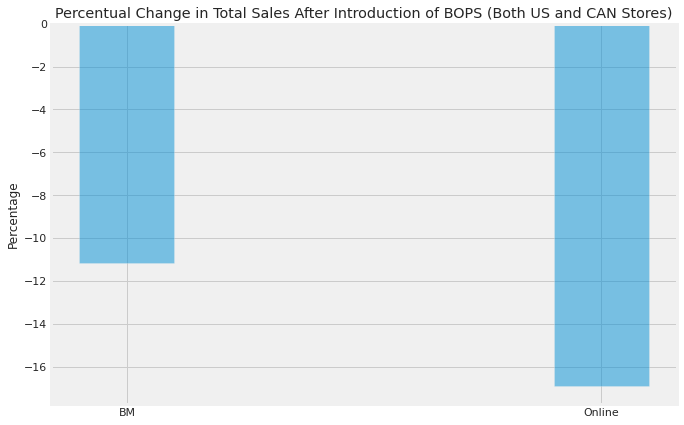

In [38]:
plt.figure(figsize=(10,7))
plt.bar(('BM','Online'),[
((bm_after[' sales '].sum() - bm_before[' sales '].sum())/bm_before[' sales '].sum())*100,
((ol_after[' sales '].sum() - ol_before[' sales '].sum())/ol_before[' sales '].sum())*100],alpha=0.5,width=0.2)
plt.title('Percentual Change in Total Sales After Introduction of BOPS (Both US and CAN Stores)')
plt.ylabel('Percentage')
plt.show()

So, we see that, although BM stores lost more money, they did not loss more precentually with respect to the previous period. It is just that BM stores simple handle more money. In reality, Online stores had more losses with respect to the previous period.

In [ ]:
####################################################



 So, it does not look rosy for both departments after implementing BOPS.
 The catch here is that it is difficult to know if these losses in sales are really due to BOPS or could be related to other externalities. 

 Le us try to elucidate that. 

One way to isolate and check the real effect of the introduction of BOPS would be to compare the US sales (where BOPS where introduced) to sales in Canada (where BOPS where not ennacted). 
Thus, Canadian stores will be our 'Control Subject'.

We separate data from US and Canada BM stores:


In [40]:
bm_usa = bm[bm['usa']==1]
bm_usa_before = bm_usa[bm_usa['after']==0]
bm_usa_after = bm_usa[bm_usa['after']==1]


bm_ca = bm[bm['usa']==0]
bm_ca_before = bm_ca[bm_ca['after']==0]
bm_ca_after = bm_ca[bm_ca['after']==1]

Total BM US sales in the period before BOPS were:

In [41]:
bm_usa_before[' sales '].sum()

122730695.0

Total BM US sales in the period after BOPS were:

In [42]:
bm_usa_after[' sales '].sum()

110455609.0

Total losses were around 12 M

In [43]:
(bm_usa_after[' sales '].sum() -bm_usa_before[' sales '].sum() )

-12275086.0

The percentual change was around -10 %

In [133]:
100*(bm_usa_after[' sales '].sum() -bm_usa_before[' sales '].sum() )/(bm_usa_before[' sales '].sum())

-10.001643028257927

Now, we compare to our total BM sales of our control subject (Canada).

We compute the BM Canada sales before BOPS:

In [127]:
bm_ca_before[' sales '].sum()

30689777.0

Total BM Canada sales after BOPS were:

In [128]:
bm_ca_after[' sales '].sum()

25853285.0

So the percentual change was around -15.7% :

In [132]:
100*(bm_ca_after[' sales '].sum() - bm_ca_before[' sales '].sum())/(bm_ca_before[' sales '].sum())

-15.759293395973518

Conclusion: For the BM case, stores with BOPS had 5% more gains than stores without BOPS.

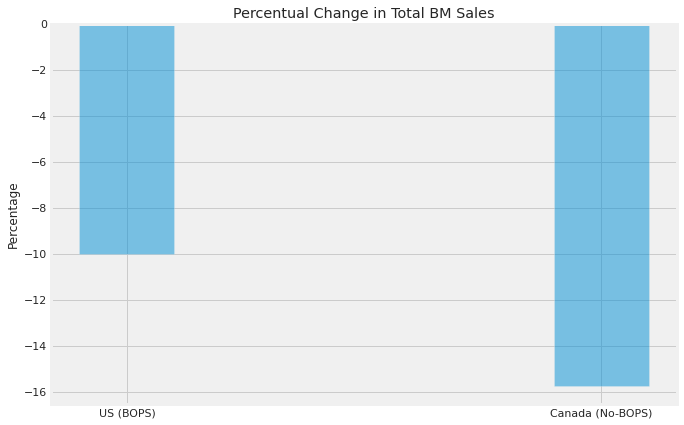

In [45]:
plt.figure(figsize=(10,7))
plt.bar(('US (BOPS)','Canada (No-BOPS)'),[
100*(bm_usa_after[' sales '].sum() -bm_usa_before[' sales '].sum() )/(bm_usa_before[' sales '].sum()),
100*(bm_ca_after[' sales '].sum() - bm_ca_before[' sales '].sum())/(bm_ca_before[' sales '].sum())
],alpha=0.5,width=0.2)
plt.title('Percentual Change in Total BM Sales')
plt.ylabel('Percentage')
plt.show()

In [ ]:
################################################

For the case of Online Stores, we can check how important the proximity to the pick-up point was for sales in the before-and-after-BOPS implementation periods.



We separate data for stores close and far from the pick-up points:


In [47]:
ol_close = ol[ol['close']==1]
ol_close_before = ol_close[ol_close['after']==0]
ol_close_after = ol_close[ol_close['after']==1]


ol_far = ol[ol['close']==0]
ol_far_before = ol_far[ol_far['after']==0]
ol_far_after = ol_far[ol_far['after']==1]

We now perform the same metrics, comparing total sales in each case.

We compute total Online (OL) sales when pick up points were close, before BOPS:

In [48]:
ol_close_before[' sales '].sum()

36090582

We compute total OL sales when pick up points were close, after BOPS:

In [49]:
ol_close_after[' sales '].sum()

29329034

Total losses where around 6.7 M

In [223]:
ol_close_after[' sales '].sum() - ol_close_before[' sales '].sum()

-6761548

Percentual losses where around 19%

In [50]:
100*(ol_close_after[' sales '].sum() - ol_close_before[' sales '].sum())/(ol_close_before[' sales '].sum())

-18.734937552406333

We now compute total OL sales with far away delivery points, before BOPS

In [51]:
ol_far_before[' sales '].sum()

44378032

We also compute total OL sales with far away delivery points, after BOPS

In [225]:
ol_far_after[' sales '].sum()

37525951

Total losses where around 7 M

In [52]:
ol_far_after[' sales '].sum() - ol_far_before[' sales '].sum()

-6852081

The percentual loss was of 15.4%

In [230]:
100*(ol_far_after[' sales '].sum() - ol_far_before[' sales '].sum())/(ol_far_before[' sales '].sum())

-15.440254313215151

The first interesting point is considering OL sales with both far and away pick up points, BEFORE implementing BOPS. One would think that in the 'before' situation, both groups would be equally indifferent of the proximity to the pick up point. However, what the see is:

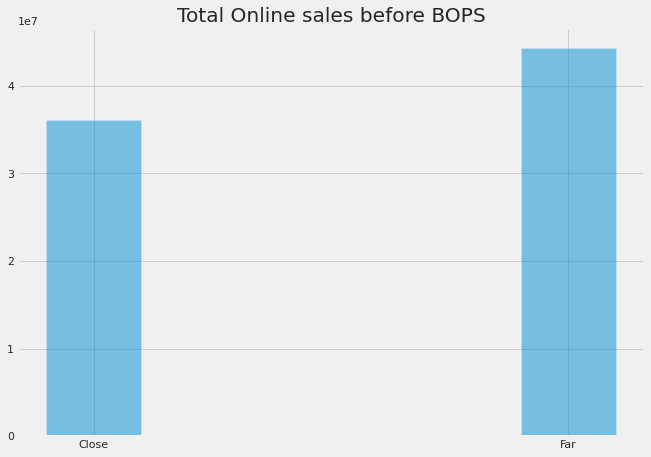

In [237]:
plt.figure(figsize=(10,7))
plt.bar(('Close','Far'),
        [ol_close_before[' sales '].sum(),ol_far_before[' sales '].sum()],
        alpha=0.5,width=0.2)
plt.title('Total Online sales before BOPS')
plt.show()

What happens after BOPS?

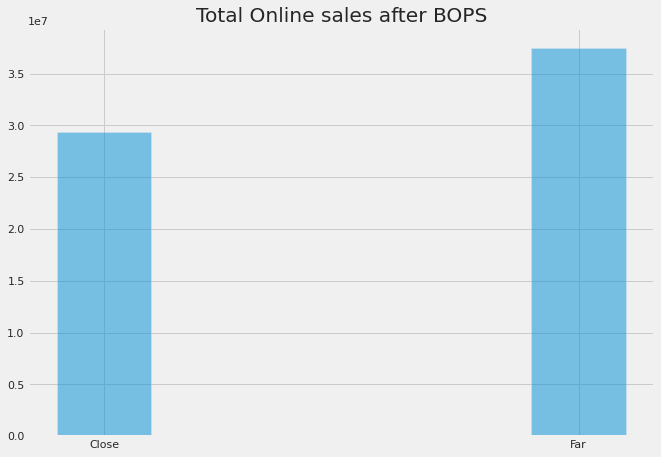

In [242]:
plt.figure(figsize=(10,7))
plt.bar(('Close','Far'),
        [ol_close_after[' sales '].sum(),ol_far_after[' sales '].sum()],
        alpha=0.5,width=0.2)
plt.title('Total Online sales after BOPS')
plt.show()

For the 'Before' situation, the change in sales between far and close cases is:

In [240]:
-ol_close_before[' sales '].sum() + ol_far_before[' sales '].sum()

8287450

while for the 'After' situation, the change in sales between far anc close cases is:

In [241]:
-ol_close_after[' sales '].sum() + ol_far_after[' sales '].sum()

8196917

That is, the change is always basically the same, and one can conclude that people really do not care terribly about the closeness of the delivery point, and that BOPS had practically no effect on this difference. 

Let us consider now the total change in total OL sales for the far and close cases:

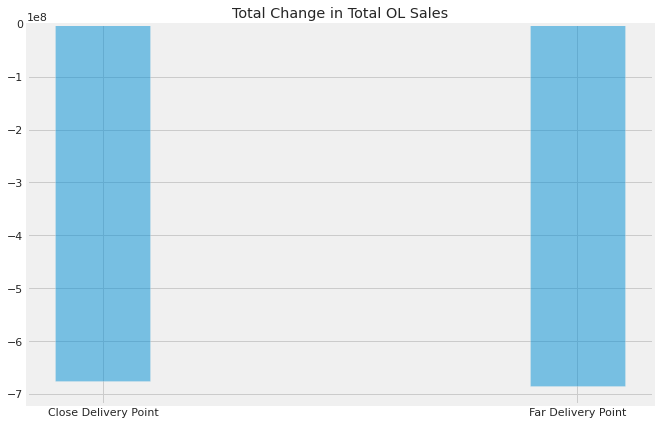

In [53]:
plt.figure(figsize=(10,7))
plt.bar(('Close Delivery Point','Far Delivery Point'),[
100*(ol_close_after[' sales '].sum() - ol_close_before[' sales '].sum()),
100*(ol_far_after[' sales '].sum() - ol_far_before[' sales '].sum())
],alpha=0.5,width=0.2)
plt.title('Total Change in Total OL Sales')
plt.show()

We indeed notice the difference in negligible. It is in fact:

In [54]:
(ol_far_after[' sales '].sum() - ol_far_before[' sales '].sum())-(ol_close_after[' sales '].sum() - ol_close_before[' sales '].sum())

-90533

which is really small. 

Finally, we compare the percentual change:

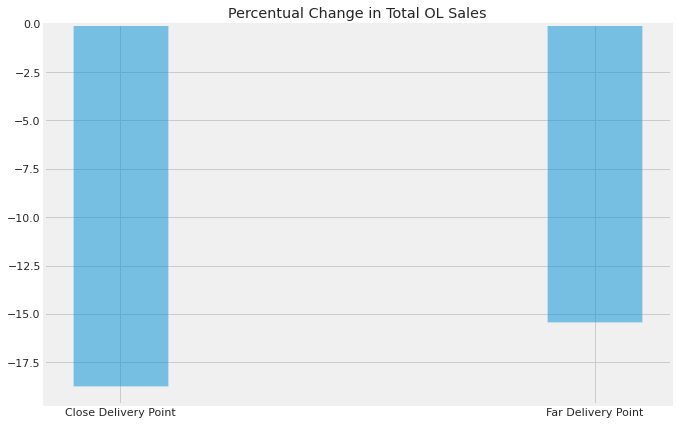

In [55]:
plt.figure(figsize=(10,7))
plt.bar(('Close Delivery Point','Far Delivery Point'),[
100*(ol_close_after[' sales '].sum() - ol_close_before[' sales '].sum())/(ol_close_before[' sales '].sum()),
100*(ol_far_after[' sales '].sum() - ol_far_before[' sales '].sum())/(ol_far_before[' sales '].sum())
],alpha=0.5,width=0.2)
plt.title('Percentual Change in Total OL Sales')
plt.show()

The difference is about 3%

In [247]:
(100*(ol_far_after[' sales '].sum() - ol_far_before[' sales '].sum())/(ol_far_before[' sales '].sum()))-100*(ol_close_after[' sales '].sum() - ol_close_before[' sales '].sum())/(ol_close_before[' sales '].sum())

3.2946832391911816

which is, again, too small a difference. 

**Conclusions**

In a nutshell:

*   Implementation of BOPS led to a 5% increase in B&M total sales compared to No-BOPS B&M stores.

*  Proximity to the delivery point in the BOPS program has negligible effect on total online sales. 

Thus, one would be inclined to recommend the introduction of the BOPS program for Canadian stores. 




**NOTE**: In the preceding analysis one could be tempted to use the available time data to do a time-series analysis, but I think the issue here is more or less resolved when looking into 'global' quantities like total sales during both six month periods. Indeed, while a time-series analysis could give you insights into te dynamical behaviour of sales (and could therefore be useful for, say, forecasting), I believe the main question can be answered looking into the global properties of the data. (Put somehow mathematically, one wants to look into the integrals of the curves, not the derivatives.) Moreover, I think a time series analysis could put us in risk of introducing too many noise in our study, making it difficult to reach useful conclusions.